In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('AmesHousing.csv')
data.head()

# Noticed that there are a lot of NaN/Null values.

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [18]:
# data.info()

In [19]:
# data.describe()

#### Below are the initial graphs used, though linear regression does not fit with SalePrice + Year Built
The correlation is not high enough. Keeping it until we remove it for final handin.

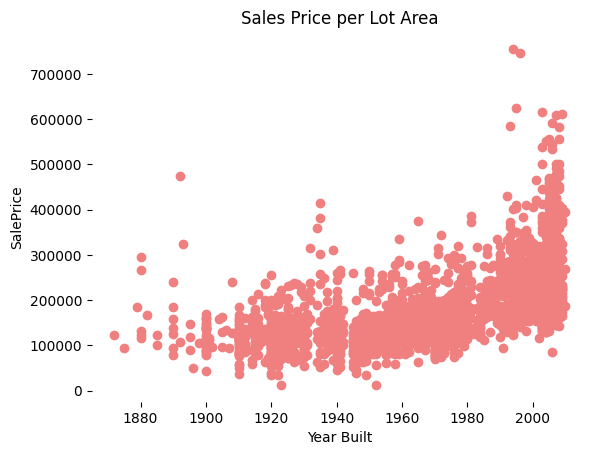

In [26]:
# Look at Lot Area and SalePrice
# SalePrice should be the Y value.

plt.scatter(data['Year Built'], data['SalePrice'], color = 'lightcoral')
plt.title('Sales Price per Lot Area')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.box(False)
plt.show()

In [28]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

categorical_df = data[categorical_columns]

# Can print all of the categorical columns by uncommenting the line below.
# print(categorical_df)


In [29]:
from pandas.api.types import is_object_dtype

def is_column_categorical(df, column_name):
    # Check if the dtype of the column is a category
    return isinstance(df[column_name].dtype, pd.CategoricalDtype) or is_object_dtype(df[column_name])


#Replace column_name with the column name you wish to check.
column_name = 'Year Built'
if is_column_categorical(data, column_name):
    print(f"The column '{column_name}' is categorical.")
else:
    print(f"The column '{column_name}' is not categorical.")


The column 'Year Built' is not categorical.


In [22]:
dependent = 'SalePrice'
independent = 'Overall Qual'

# Combine independent and dependent variables into a single DataFrame
data = data[[independent, dependent]]

# Drop rows where either independent or dependent variable is NaN
# We need to see if this is a valid option, as too many NaN values would ruin our results.
# Maybe we should do the median stuff?
data = data.dropna()

# Separate the cleaned data back into X and y
X = data[[independent]]
y = data[dependent]

# Splitting the data into training and testing sets with 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions on test and train data
Y_pred_test = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)

In [23]:
# For fun, got help from chatgpt to implement RMSE, MAE etc to see the numerical values of the difference between the models.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get predictions on both the training and test sets
Y_pred_train = regressor.predict(X_train)
Y_pred_test = regressor.predict(X_test)

# Calculate evaluation metrics for the training set
mse_train = mean_squared_error(y_train, Y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, Y_pred_train)
r2_train = r2_score(y_train, Y_pred_train)

# Calculate evaluation metrics for the test set
mse_test = mean_squared_error(y_test, Y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, Y_pred_test)
r2_test = r2_score(y_test, Y_pred_test)

# Print the results
print("Training Set Evaluation:")
print(f"RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")

print("\nTest Set Evaluation:")
print(f"RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")


Training Set Evaluation:
RMSE: 46744.71323214022, MAE: 32962.20147394316, R²: 0.6324984751365332

Test Set Evaluation:
RMSE: 52878.67835801961, MAE: 36141.27154662751, R²: 0.6512456615180713


RMSE indicates typical error magnitude in the predictions.

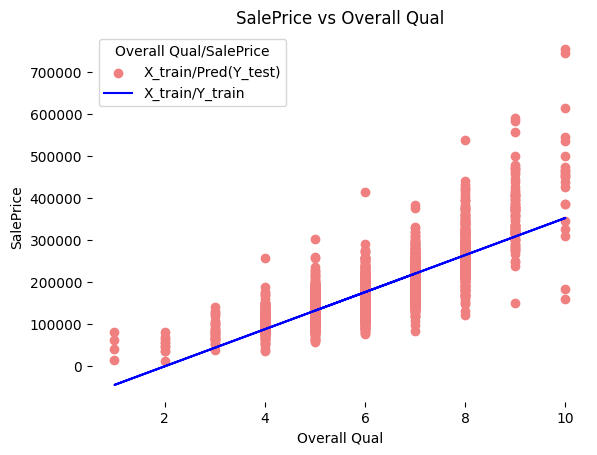

In [17]:
# Plot the prediction on training set.
plt.scatter(X_train, y_train, color ='lightcoral')
plt.plot(X_train, Y_pred_train, color='blue')
plt.title(dependent + ' vs ' + independent)
plt.xlabel(independent)
plt.ylabel(dependent)
plt.legend(['X_train/Pred(Y_test)', 'X_train/Y_train'], title = independent + '/' + dependent, loc = 'best', facecolor='white')
plt.box(False)
plt.show()

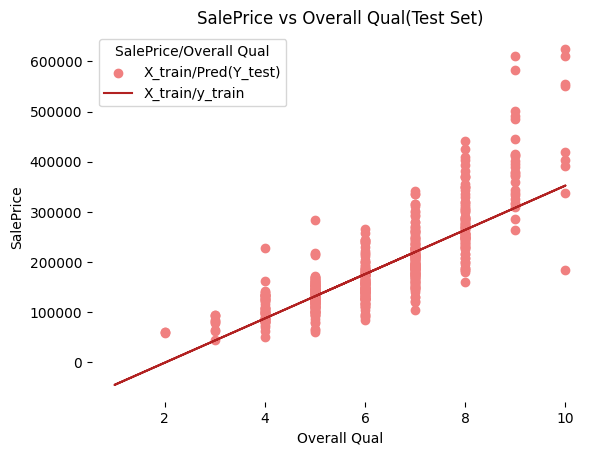

In [20]:
# Plot test set data vs its prediction.
plt.scatter(X_test, y_test, color='lightcoral')
plt.plot(X_train, Y_pred_train, color ='firebrick')
plt.title(dependent + ' vs ' + independent + '(Test Set)')
plt.xlabel(independent)
plt.ylabel(dependent)
plt.legend(['X_train/Pred(Y_test)', 'X_train/y_train'], title = dependent + '/' + independent)
plt.box(False)
plt.show()

There is a rather substantial error for this dataset and X & Y chosen, and it looks like the model would work better with the polynomial model instead of linear regression.
It is clear that we are missing a relationship that also influences the price of a house, which makes sense as how big the house is would also impact price, as well as its location. If it's in the middle of nowhere, then it's usually not desirable and thus lower price for the house.

In [34]:
# coefficient: for each year a house is built later, the predicted sale price is increased by the coefficient number,
# in this case 1386 dollars.
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [1386.37904367]
Intercept: -2553287.16113109


In [24]:
# Made by Sigve
categories = {}
for column in data.columns:
    if data[column].dtype == 'object':
        data[column], categories[column] = data[column].factorize()
        data[column] += 1
data
data[column] = data[column].astype(str).astype(int)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation values (change corr_test to which column you wish to test)
corr_test = 'Overall Qual'
pid_correlations = correlation_matrix[corr_test]

# Sort the correlation values in descending order
sorted_pid_correlations = pid_correlations.sort_values(ascending=False)

# Print the sorted correlation values
print(sorted_pid_correlations)


Overall Qual    1.000000
SalePrice       0.799262
Name: Overall Qual, dtype: float64


In [36]:
""" column = 'SalePrice'
categories = {}
for column in data.columns:
    if data[column].dtype == 'object':
        data[column], categories[column] = data[column].factorize()
        data[column] += 1
data """


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,1,141.0,31770,1,0,1,1,...,0,0,0,0,0,5,2010,1,1,215000
1,2,526350040,20,2,80.0,11622,1,0,2,1,...,0,0,1,0,0,6,2010,1,1,105000
2,3,526351010,20,1,81.0,14267,1,0,1,1,...,0,0,0,1,12500,6,2010,1,1,172000
3,4,526353030,20,1,93.0,11160,1,0,2,1,...,0,0,0,0,0,4,2010,1,1,244000
4,5,527105010,60,1,74.0,13830,1,0,1,1,...,0,0,1,0,0,3,2010,1,1,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,1,37.0,7937,1,0,1,1,...,0,0,2,0,0,3,2006,1,1,142500
2926,2927,923276100,20,1,NaN,8885,1,0,1,4,...,0,0,1,0,0,6,2006,1,1,131000
2927,2928,923400125,85,1,62.0,10441,1,0,2,1,...,0,0,1,2,700,7,2006,1,1,132000
2928,2929,924100070,20,1,77.0,10010,1,0,2,1,...,0,0,0,0,0,4,2006,1,1,170000
